In [4]:
from qiskit_aer import AerSimulator

from vbe_arithmetic import ripple_add_dg, create_circuit

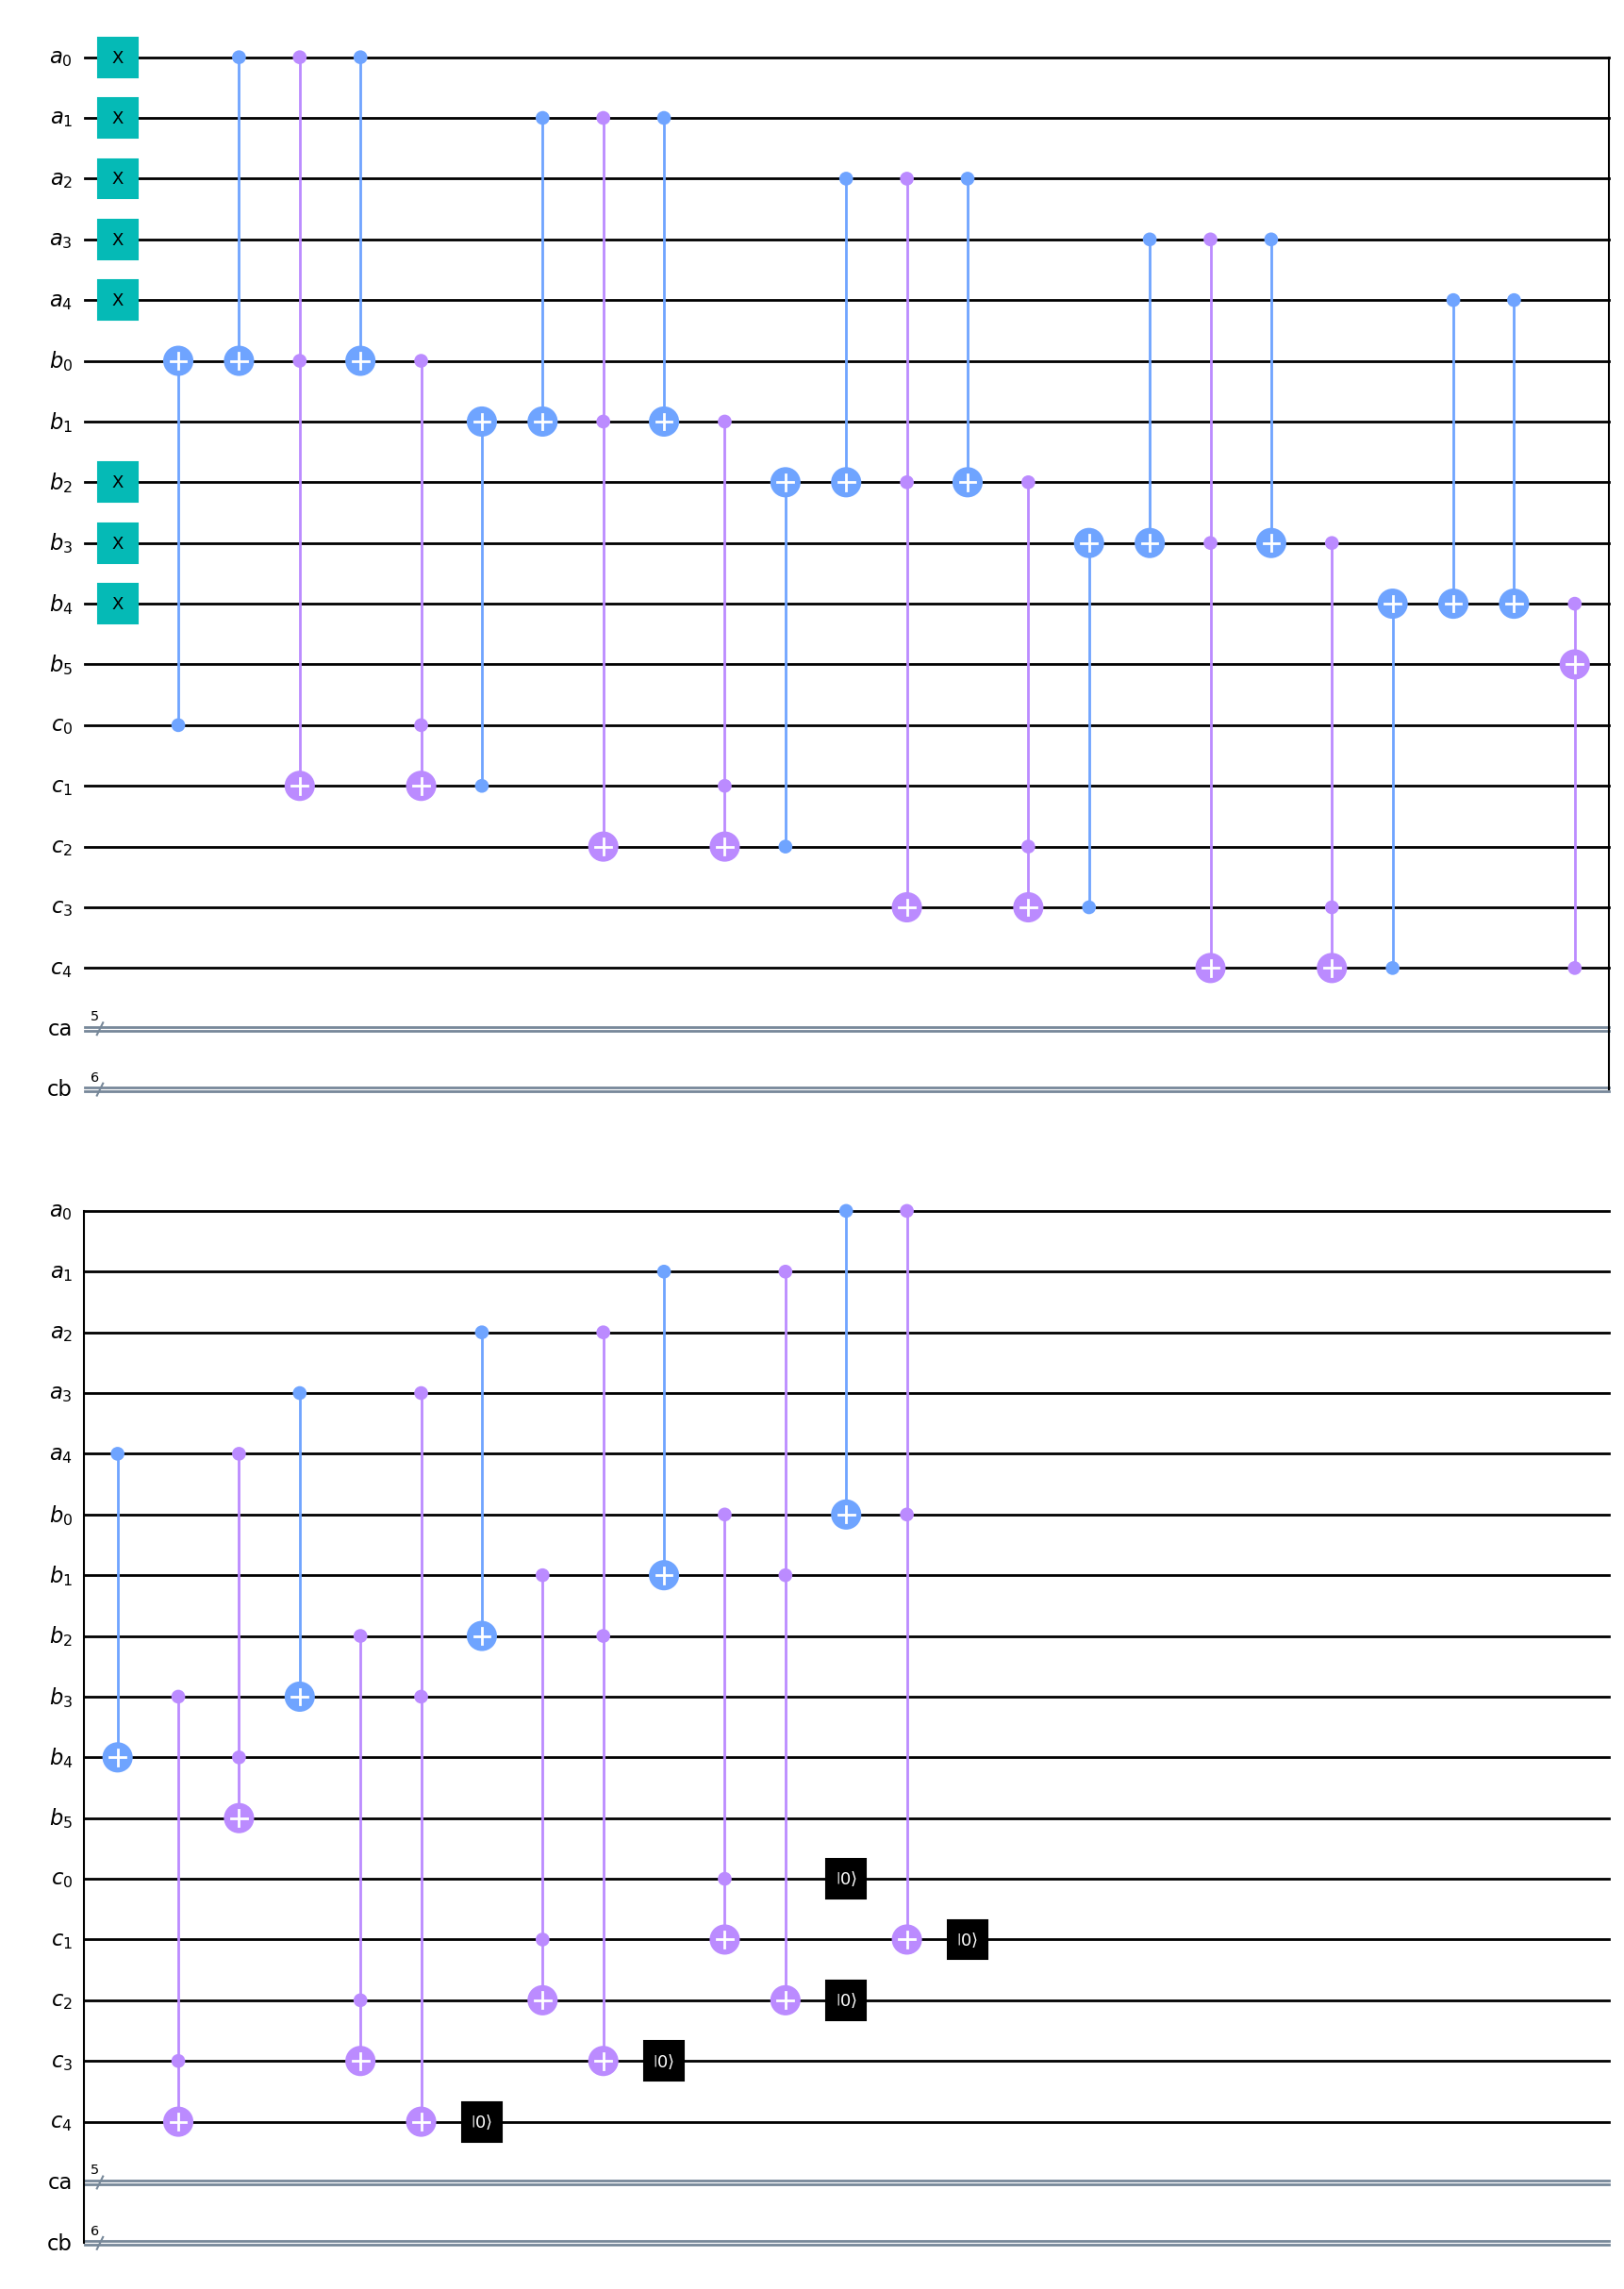

In [5]:
# Input bits
a_dec = 31 #[1, 1, 1, 1, 1]
b_dec = 28 #[1, 1, 1, 0, 0]

# Number of bits in the binary numbers
N = max(a_dec.bit_length(), b_dec.bit_length())

qc, a, b, c, ca, cb = create_circuit(a_dec, b_dec, N)

# Subtract a from b
# i.e. 'b - a'
# if b >= a:
#   then result is |a, b-a>
# if b < a:
#    then result is 2^(N+1)-(a-b)
#
# For example, if a = (11111)2 = (31)10
#                 b = (11100)2 = (28)10
#
# Here, b < a, as a result, the circuit will produce :
# 2^(N+1)-(a-b) = 2^(5+1)-(31-28) = 64-3 = (61)10 = (111101)2
ripple_add_dg(qc, a, b, c, N)

qc.draw(output="mpl", filename="circuits/1996_subtractor.png", style="clifford")

In [6]:
qc.measure(a, ca)
qc.measure(b, cb)

backend_sim = AerSimulator()
job_sim = backend_sim.run(qc, shots=1)
result_sim = job_sim.result()

print(result_sim.get_counts(qc))

{'111101 11111': 1}
